# **Regressão Linear Múltipla**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
enem = pd.read_csv('enem_2019_tratado.csv', sep=',', encoding='iso-8859-1')

## Análise inicial

**Objetivo: Criar um modelo matemático de regressão linear múltipla para prever a nota de redação tendo como variáveis independentes as notas de seus componentes.**

In [ ]:
enem.head(10)

In [ ]:
enem.columns

In [ ]:
enem.shape

**Selecionando apenas um dos colégios**

In [ ]:
colegiox = enem.loc[enem.CO_ESCOLA == 35132287]

In [ ]:
colegiox.head()

In [ ]:
colegiox.shape

**Valores Missing**

In [ ]:
colegiox.isnull().sum()

In [ ]:
colegiox.dtypes

## **Regressão múltipla com statsmodel**

## **MODELO 1**

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [ ]:
variaveis = colegiox[['NOTA_REDACAO', 'COMP2', 'COMP4', 'COMP5']]

In [ ]:
variaveis.corr()

In [ ]:
modelo = smf.ols('NOTA_REDACAO ~ COMP2 + COMP4 + COMP5', data = colegiox).fit()

In [ ]:
residuos = modelo.resid
residuos

### Teste de Normalidade dos resíduos

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
import scipy.stats as stats

In [ ]:
estatistica, p = stats.shapiro(residuos)

In [ ]:
p

In [ ]:
# Resíduos possuem distribuição normal!

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.show()

### Análise da Homocedasticidade dos resíduos
(resíduos com variação constante)

In [ ]:
plt.scatter(y=residuos, x=modelo.predict(), color='red')
plt.hlines(y=0, xmin=550, xmax=1000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade)

Ho = existe homocedasticidade : p > 0.05

Ha = não existe homocedasticidade : p <= 0.05

In [ ]:
from statsmodels.compat import lzip

In [ ]:
estatistica, p, f, fp = sms.het_breuschpagan(modelo.resid, modelo.model.exog)

In [ ]:
p

### **Outliers nos resíduos**

(Entre -3 e 3)

In [ ]:
outliers = modelo.outlier_test()

In [ ]:
outliers.max()

In [ ]:
outliers.min()

### **Ausência de Multicolinearidade**

Somente entre as variáveis independentes.

Considerada multicolinearidade quando r > 0.9.

In [ ]:
variaveis = colegiox[['COMP2', 'COMP4', 'COMP5']]

In [ ]:
correlacoes = variaveis.corr()

In [ ]:
correlacoes

Usando Fator de Inflação de Variância (VIF)

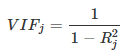

Esse valor deve ser menor que 5!

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
vif = add_constant(variaveis) # função espera a presença de uma constante na matriz de variáveis ​​explicativas
pd.Series([variance_inflation_factor(vif.values, j) for j in range(vif.shape[1])], index=vif.columns)

In [ ]:
vif

### **Análise do Modelo**

Análise do modelo

Intercept e Coeficiente

p_valor para cada coeficiente < 0,05 (estatisticamente significativos).

Adjusted R-squared (explicação do modelo através dos dados).

p_valor da estatística F < 0.05 (valida o modelo de regressão).

In [ ]:
print(modelo.summary())


**Equação:** Nota Redação = 116,1987 + 1,2831.COMP2 + 1,7298.COMP4 + 1,1993.COMP5

In [ ]:
# Criando uma coluna de previsão
colegiox['previsao'] = modelo.fittedvalues

In [ ]:
colegiox.head()

## **MODELO 2**

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [ ]:
# Criação do modelo
modelo2 = smf.ols('NOTA_REDACAO ~ COMP2 + COMP4', data = colegiox).fit()

In [ ]:
residuos2 = modelo2.resid
residuos2

### Teste de Normalidade dos resíduos

In [ ]:
import scipy.stats as stats

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
estatistica, p = stats.shapiro(residuos2)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
stats.probplot(residuos2, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

### Análise da Homocedasticidade dos resíduos
(resíduos com variação constante)

In [ ]:
plt.scatter(y=residuos2, x=modelo2.predict(), color='red')
plt.hlines(y=0, xmin=600, xmax=1000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade)

Ho = existe homocedasticidade : p > 0.05

Ha = não existe homocedasticidade : p <= 0.05

In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [ ]:
estatistica, p, f, fp = sms.het_breuschpagan (modelo2.resid, modelo2.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

### **Outliers nos resíduos**

(Entre -3 e 3)

In [ ]:
outliers = modelo2.outlier_test()

In [ ]:
outliers.max()

In [ ]:
outliers.min()

### **Independência dos resíduos (Durbin-Watson)**
ideal para medidas repetidas (longitudinais: Ex: mesmo aluno)

A estatística de teste é aproximadamente igual a 2 * (1-r) onde r é a autocorrelação da amostra dos resíduos. Assim, para r = 0, a estatística de teste é igual a 2, indicando independência dos resíduos (o resultado vai de 0 a 4).

In [ ]:
import statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning


In [ ]:
estatistica = statsmodels.stats.stattools.durbin_watson(modelo2.resid)
print('Estatística de teste: {}'.format(estatistica))

### **Ausência de Multicolinearidade**

Somente entre as variáveis independentes.

Considerada multicolinearidade quando r > 0.9.

In [ ]:
variaveis2 = colegiox[['COMP2','COMP4']]

In [ ]:
variaveis2.head()

In [ ]:
correlacoes = variaveis2.corr(method='pearson')
correlacoes

Usando Fator de Inflação de Variância (VIF)

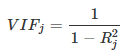

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
vif = add_constant(variaveis2) # função espera a presença de uma constante na matriz de variáveis ​​explicativas
pd.Series([variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])], index=vif.columns)

### **Análise do Modelo**

Análise do modelo

Intercept

p_valor para cada coeficiente < 0,05 (estatisticamente significativos).

Adjusted R-squared (explicação do modelo através dos dados).

p_valor da estatística F < 0.05 (valida o modelo de regressão).

In [ ]:
print(modelo2.summary())

**Equação:** Nota Redação = 214,0062 + 1,4391.COMP2 + 2,1895.COMP4

In [ ]:
# Criando uma coluna com previsão
colegiox['previsao2'] = modelo2.fittedvalues

In [ ]:
colegiox.head()

### **COMPARAÇÃO ENTRE MODELOS**

**Critério de Informação de Akaike (AIC)**

O melhor modelo é com resultado menor (menor variação dos resíduos)

In [ ]:
modelo1.aic

In [ ]:
modelo2.aic

**Critério de Informação Bayesiano (BIC)**

O melhor modelo é com resultado menor (menor variação dos resíduos)

In [ ]:
modelo1.bic

In [ ]:
modelo2.bic

**Coeficiente de determinação (R^2)**

In [ ]:
modelo1.rsquared_adj

In [ ]:
modelo2.rsquared_adj

## **REGRESSÃO MÚLTIPLA COM SCIKIT-LEARN**

## **MODELO 3**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
independente = colegiox[['COMP2','COMP4','COMP5']]


In [ ]:
independente

In [ ]:
dependente = colegiox[['NOTA_REDACAO']]

In [ ]:
dependente

In [ ]:
modelo3 = LinearRegression()
modelo3.fit(independente, dependente)

In [ ]:
modelo3.intercept_

In [ ]:
modelo3.coef_

In [ ]:
print("Equação: NOTA REDAÇÃO = {:.2f} + {:.2f}*COMP2 + {:.2f}*COMP4 + {:.2f}*COMP5".format(modelo3.intercept_[0], modelo3.coef_[0][0], modelo3.coef_[0][1], modelo3.coef_[0][2]))

In [ ]:
modelo3.score(independente, dependente)

## **MODELO 4**

In [ ]:
independente2 = colegiox[['COMP2','COMP4']]

In [ ]:
dependente2 = colegiox[['NOTA_REDACAO']]

In [ ]:
modelo4 = LinearRegression()
modelo4.fit(independente2, dependente2)

In [ ]:
modelo4.intercept_

In [ ]:
modelo4.coef_

In [ ]:
print("Equação: NOTA REDAÇÃO = {:.2f} + {:.2f}*COMP2 + {:.2f}*COMP4".format(modelo4.intercept_[0], modelo4.coef_[0][0], modelo4.coef_[0][1]))

In [ ]:
modelo4.score(independente2, dependente2)